In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from sklearn.datasets import make_classification


In [201]:
data = pd.read_csv(r"C:\Users\pierr\Documents\FISE A2\Data Science\Traffic accidents\chicago_crashes_cleaned_32.csv", sep= ",")

# Current Data

The current data are currently uneven: ideal conditions, i.e. driving in clear weather, during the day and on dry roads, are over-represented. 
We will try to rebalance the data by oversampling the data at night, under bad conditions using the SMOTE technique.

In [202]:
data_vis=data
data_vis = data_vis.loc[data_vis['WEATHER_CONDITION']\
                        .isin(['CLEAR', 'RAIN', 'CLOUDY/OVERCAST', 'SNOW'])]
data_vis = data_vis.loc[~data_vis['LIGHTING_CONDITION']\
                        .isin(['UNKNOWN'])]
data_vis = data_vis.loc[data_vis['ROADWAY_SURFACE_COND']\
                        .isin(['DRY', 'WET', 'SNOW OR SLUSH'])]
data_vis = data_vis.loc[data_vis['PRIM_CONTRIBUTORY_CAUSE']\
                        .isin(['FAILING TO YIELD RIGHT-OF-WAY',\
                               'IMPROPER OVERTAKING/PASSING',\
                              'IMPROPER BACKING', \
                              'IMPROPER LANE USAGE',\
                              'FOLLOWING TO CLOSELY',\
                              'FAILING TO REDUCE SPEED TO AVOID CRASH',\
                              'IMPROPER TURNING/NO SIGNAL',\
                              'DRIVING SKILLS/KONWLEDGE/EXPERIENCE'])]


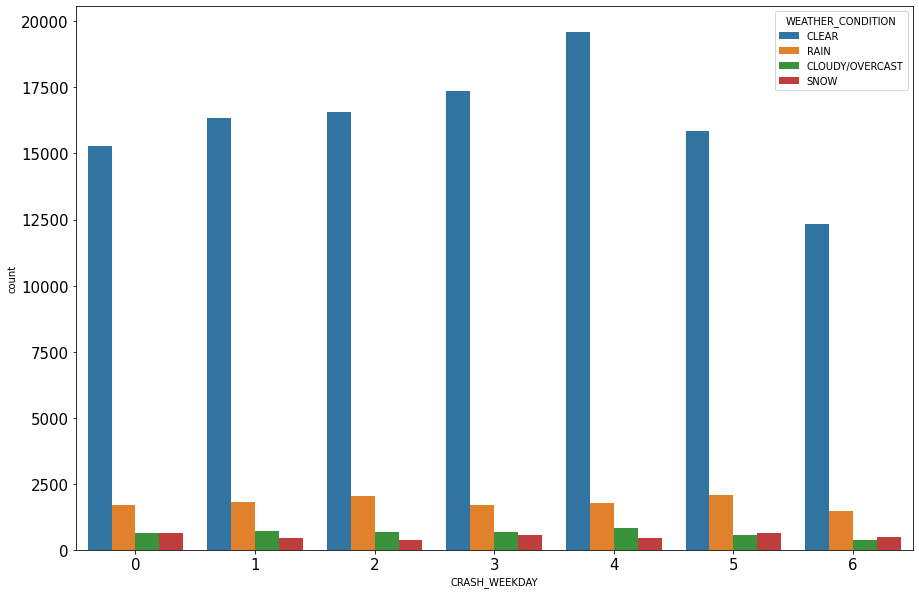

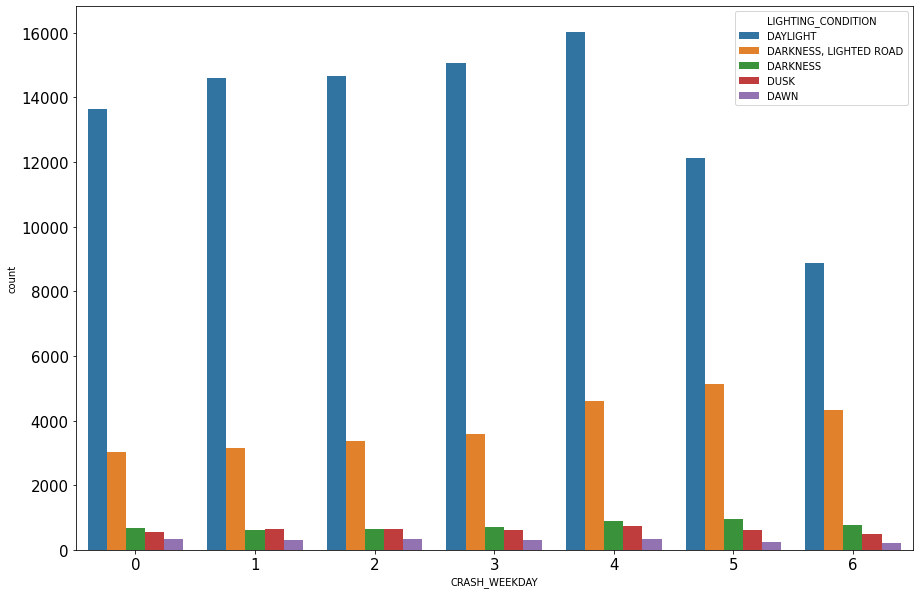

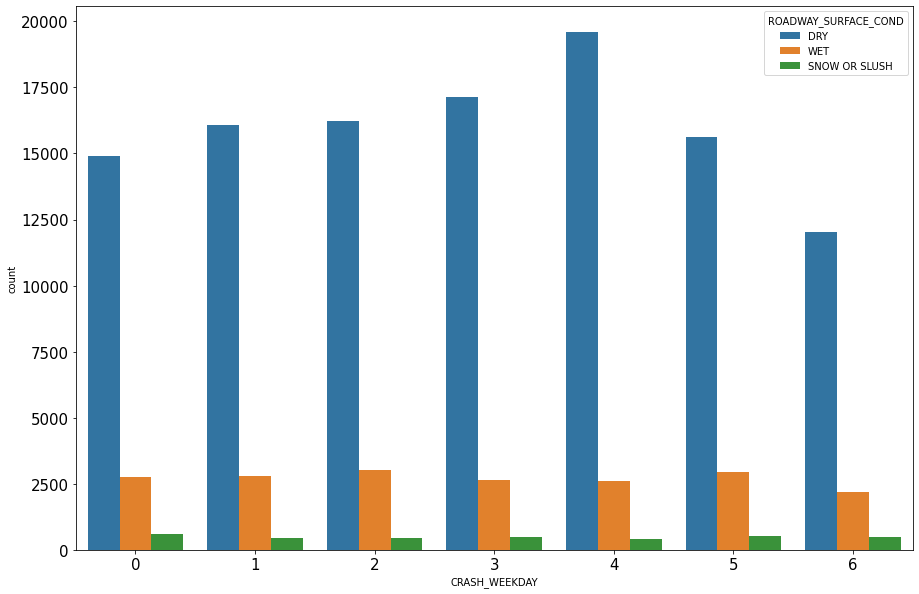

In [203]:
cols = ['CRASH_WEEKDAY', \
       #'dDAMAGE', 'CRASH_HOUR'
       ]

hues = ['WEATHER_CONDITION', 'LIGHTING_CONDITION',\
        'ROADWAY_SURFACE_COND']

max_width = 10

i=0
for col in data_vis[cols]:
    for hue in data_vis[hues]:
        plt.figure(i, figsize=(15.0,10.0))
        b = sns.countplot(x=col, hue=hue, data=data_vis)
        b.tick_params(labelsize=15)
        b.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in b.get_xticklabels())
        i+=1


# Oversampling with SMOTE 

### a) Oversampling Rain

In [204]:
#dataset composed only of accidents in rainy weather
rain_Weather = data_vis[data_vis['WEATHER_CONDITION']=='RAIN']
rain_Weather.shape

#dataset composed only of accidents in clear weather conditions
clear_Weather = data_vis[data_vis['WEATHER_CONDITION']=='CLEAR']



In [247]:
#Dataset composed only of accidents in clear and rain conditions
data_ClearRainCondition = data_vis.loc[data_vis['WEATHER_CONDITION']\
                        .isin(['CLEAR', 'RAIN'])]

In [248]:
data_ClearRainCondition = data_ClearRainCondition.drop(['Unnamed: 0','CRASH_DATE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',	'STREET_DIRECTION',	'STREET_NAME', 'INTERSECTION_RELATED_I',	'NOT_RIGHT_OF_WAY_I',	'DAMAGE',	'PRIM_CONTRIBUTORY_CAUSE', 'grid'], axis=1)

In [249]:
data_ClearRainCondition.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,LATITUDE,LONGITUDE,CRASH_WEEKDAY,CRASH_HOUR,CRASH_Month
0,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,INJURY AND / OR TOW DUE TO CRASH,41.741804,-87.740954,4,16,6
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO INJURY / DRIVE AWAY,41.903825,-87.643286,3,17,8
5,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,WET,NO INJURY / DRIVE AWAY,41.721290,-87.628510,2,11,5
9,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,ONE-WAY,DRY,NO INJURY / DRIVE AWAY,41.907777,-87.634531,3,18,5
11,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO INJURY / DRIVE AWAY,41.911051,-87.632436,6,14,1


In [265]:
data_encode.drop(['WEATHER_CONDITION_CLEAR', 'WEATHER_CONDITION_RAIN'], axis=1)
data_encode['WEATHER_CONDITION']= data_ClearRainCondition['WEATHER_CONDITION']

In [266]:
data_encode.shape

(125817, 84)

In [217]:
data_ClearRainCondition['WEATHER_CONDITION'].value_counts()

CLEAR    113317
RAIN      12500
Name: WEATHER_CONDITION, dtype: int64

In [267]:
y =data_encode['WEATHER_CONDITION']
X = data_encode(['WEATHER_CONDITION'], axis=1)

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

TypeError: 'DataFrame' object is not callable

In [261]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (88071, 13)
Number transactions y_train dataset:  (88071,)
Number transactions X_test dataset:  (37746, 13)
Number transactions y_test dataset:  (37746,)


In [262]:
print("Before OverSampling, counts of label 'RAIN': {}".format(sum(y_train=='RAIN')))
print("Before OverSampling, counts of label 'CLEAR': {} \n".format(sum(y_train=='CLEAR')))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label 'RAIN': 8656
Before OverSampling, counts of label 'CLEAR': 79415 



ValueError: could not convert string to float: 'STOP SIGN/FLASHER'